In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('auto-mpg.csv')

In [16]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [17]:
from sklearn.model_selection import train_test_split

random_state = 42
train_data, test_data = train_test_split(df, test_size=0.25, random_state=random_state)

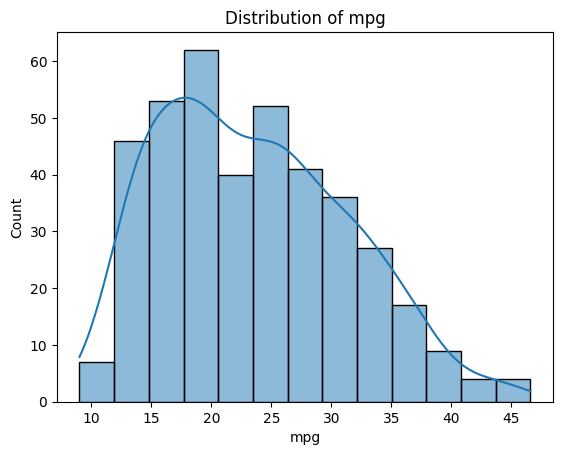

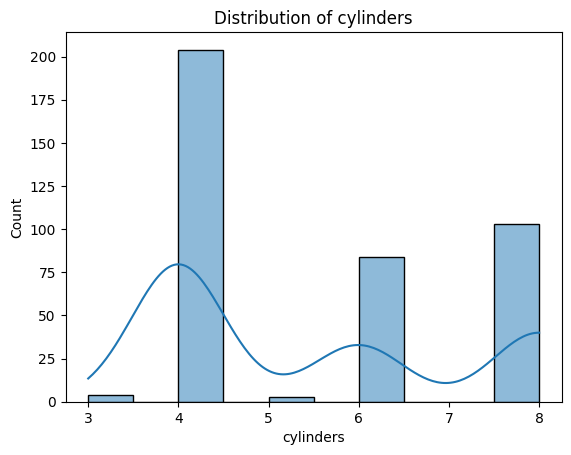

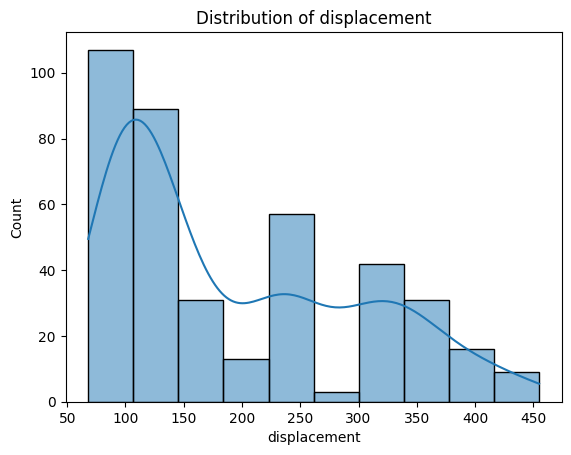

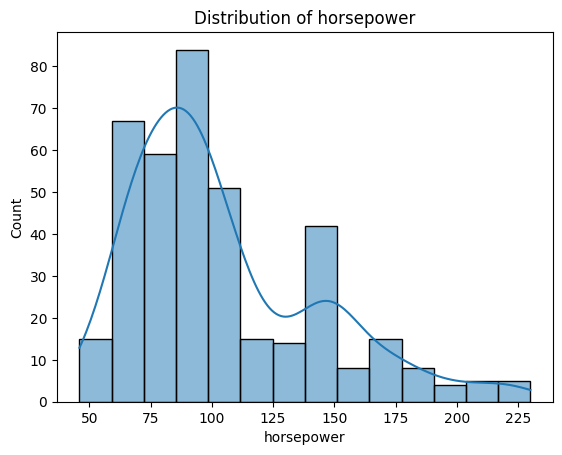

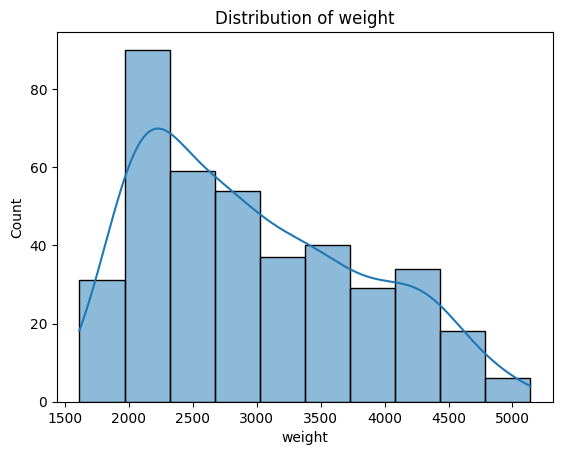

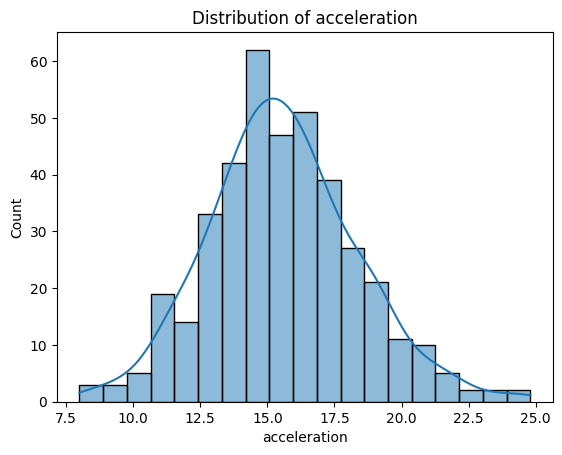

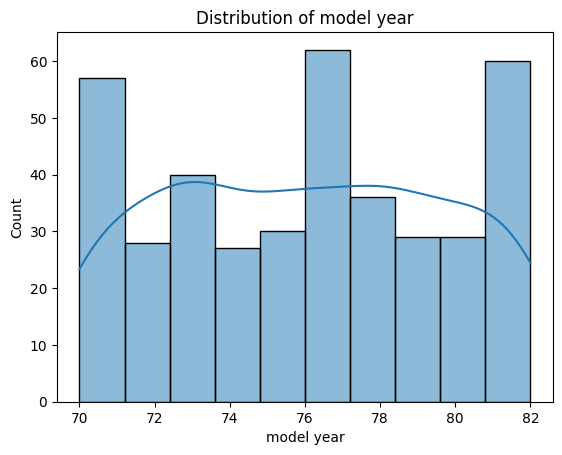

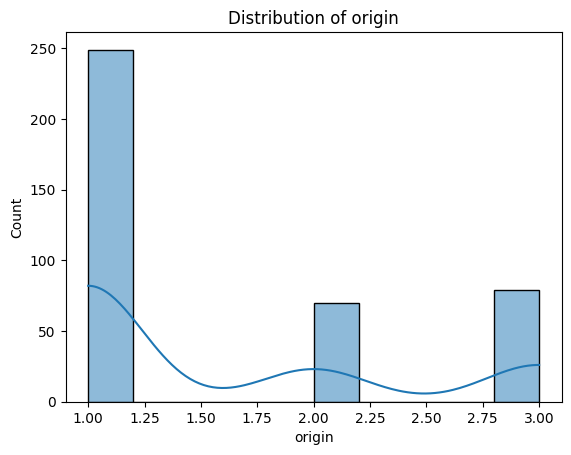

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

symmetric_columns = []
skewed_columns = []
categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        plt.figure()
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

        skewness = df[column].skew()
        if abs(skewness) <= 0.5:
            symmetric_columns.append(column)
        else:
            skewed_columns.append(column)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import numpy as np

numeric_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])


In [20]:
from sklearn.compose import ColumnTransformer

numeric_columns = symmetric_columns + skewed_columns
preprocessor = ColumnTransformer([
    ('numeric_symmetric', numeric_symmetric_pipeline, symmetric_columns),
    ('numeric_skewed', numeric_skewed_pipeline, skewed_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])

preprocessed_data = preprocessor.fit_transform(df)

In [21]:
preprocessor.fit(df)
X_train_transformed = preprocessor.transform(train_data)
X_test_transformed = preprocessor.transform(test_data)

In [22]:
print("Train data shape")
print(X_train_transformed.shape)

Train data shape
(298, 313)


In [23]:
print("Test data shape")
print(X_test_transformed.shape)

Test data shape
(100, 313)
